In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, train_test_split

In [92]:
#data_path = "./datasets/WASSA23_essay_level_train_preproc.tsv"
data_path22 = "./dataset_empathy_wassa/data/messages_train_ready_for_WS.tsv"
#data_path23 = "./dataset_empathy_wassa/data/WASSA23_essay_level_with_labels_train.tsv"
data22 = pd.read_csv(data_path22, sep='\t')
#data23 = pd.read_csv(data_path23, sep='\t')

#data = pd.concat([data22, data23], ignore_index=True)
#data.to_csv("./dataset_empathy_wassa/all_data.tsv", sep='\t', index=False)
data

,message_id,response_id,article_id,empathy,distress,empathy_bin,distress_bin,essay,emotion,gender,...,personality_stability,iri_perspective_taking,iri_personal_distress,iri_fantasy,iri_empathatic_concern,conversation_id,speaker_id,speaker_number,split,essay_id
0,R_1hGrPtWM4SumG0U_1,R_1hGrPtWM4SumG0U,67,5.667000,4.375,1.0,1.0,it is really diheartening to read about these ...,sadness,1,...,5.5,3.571,2.0,3.429,4.0,NaN,NaN,NaN,NaN,NaN
1,R_1hGrPtWM4SumG0U_2,R_1hGrPtWM4SumG0U,86,4.833000,4.875,1.0,1.0,the phone lines from the suicide prevention li...,sadness,1,...,5.5,3.571,2.0,3.429,4.0,NaN,NaN,NaN,NaN,NaN
2,R_1hGrPtWM4SumG0U_3,R_1hGrPtWM4SumG0U,206,5.333000,3.500,1.0,0.0,"no matter what your heritage, you should be ab...",neutral,1,...,5.5,3.571,2.0,3.429,4.0,NaN,NaN,NaN,NaN,NaN
3,R_1hGrPtWM4SumG0U_4,R_1hGrPtWM4SumG0U,290,4.167000,5.250,1.0,1.0,it is frightening to learn about all these sha...,fear,1,...,5.5,3.571,2.0,3.429,4.0,NaN,NaN,NaN,NaN,NaN
4,R_1hGrPtWM4SumG0U_5,R_1hGrPtWM4SumG0U,342,5.333000,4.625,1.0,1.0,the eldest generation of russians aren't being...,sadness,1,...,5.5,3.571,2.0,3.429,4.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2647,NaN,NaN,218,6.500000,6.750,NaN,NaN,I feel that this will become a national proble...,Neutral,1,...,6.0,4.857,2.0,3.429,5.0,495.0,30.0,2.0,train,994.0
2648,NaN,NaN,103,3.166667,6.375,NaN,NaN,The whole situation is sketchy. The wavering r...,Neutral,2,...,3.5,5.0,4.143,4.857,5.0,496.0,16.0,2.0,train,995.0
2649,NaN,NaN,103,6.000000,2.000,NaN,NaN,The death of a former aide to Russian Presiden...,Neutral,2,...,7.0,4.286,1.286,3.857,4.0,498.0,43.0,2.0,train,997.0
2650,NaN,NaN,103,6.000000,6.000,NaN,NaN,Everything about Russia really freaks me out. ...,Fear,2,...,6.0,4.0,2.286,3.571,3.714,499.0,53.0,2.0,train,998.0


In [93]:
def split(data, k, val_size, shuffle, seed):
    splitter = KFold(n_splits=k, shuffle=shuffle, random_state=seed)
    for i, (train_idx, test_idx) in enumerate(splitter.split(data)):
        train_split = data.iloc[train_idx]
        test_split = data.iloc[test_idx]
        internal_train_split, internal_val_split = train_test_split(train_split, test_size=val_size)
        internal_train_split.to_csv(f"./dataset_empathy_wassa22/internal_train_split{i}.tsv", sep='\t', index=False)
        internal_val_split.to_csv(f"./dataset_empathy_wassa22/internal_val_split{i}.tsv", sep='\t', index=False)
        test_split.to_csv(f"./dataset_empathy_wassa22/test_split{i}.tsv", sep='\t', index=False)

In [94]:
#split(data, k=3, val_size=0.1, shuffle=False, seed=None)

In [95]:
# split 0
int_train = pd.read_csv("./dataset_empathy_wassa22/internal_train_split0.tsv", sep='\t')
int_val = pd.read_csv("./dataset_empathy_wassa22/internal_val_split0.tsv", sep='\t')
test = pd.read_csv("./dataset_empathy_wassa22/test_split0.tsv", sep='\t')

In [96]:
int_train

,message_id,response_id,article_id,empathy,distress,empathy_bin,distress_bin,essay,emotion,gender,...,personality_stability,iri_perspective_taking,iri_personal_distress,iri_fantasy,iri_empathatic_concern,conversation_id,speaker_id,speaker_number,split,essay_id
0,NaN,NaN,375,3.166667,1.000,NaN,NaN,It is difficult to convey my thoughts and feel...,Neutral,1,...,7.0,3.714,1.0,2.429,1.429,163.0,35.0,2.0,train,662.0
1,NaN,NaN,3,2.500000,3.250,NaN,NaN,Hello friend. It's with a heavy heart that I'm...,Sadness,unknown,...,unknown,unknown,unknown,unknown,unknown,74.0,31.0,1.0,train,73.0
2,R_2qxSe9C1FHoZe8D_4,R_2qxSe9C1FHoZe8D,335,2.333000,1.000,0.0,0.0,Apparently the giant albatross is being destro...,surprise,2,...,7.0,4.0,3.286,4.2860000000000005,4.857,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,48,6.000000,5.000,NaN,NaN,This article was just heartbreaking. I just pi...,Sadness,2,...,6.0,4.0,2.286,3.571,3.714,307.0,53.0,1.0,train,306.0
4,NaN,NaN,34,4.833333,5.500,NaN,NaN,I think that placing blame does little to help...,Anger/Disgust,1,...,5.5,5.0,2.286,3.286,4.143,262.0,25.0,2.0,train,761.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586,NaN,NaN,233,4.000000,4.000,NaN,NaN,I am expressing my concern over the fact that ...,Neutral,2,...,6.0,3.714,2.857,2.571,3.429,91.0,5.0,2.0,train,590.0
1587,R_ai7GEqMhZmqarrr_4,R_ai7GEqMhZmqarrr,269,1.000000,2.125,0.0,0.0,I’m so tired of Republicans. They never compro...,anger,1,...,2.5,3.0,3.714,3.714,2.714,NaN,NaN,NaN,NaN,NaN
1588,R_2D8EJ23JFdZWYyR_5,R_2D8EJ23JFdZWYyR,378,7.000000,7.000,1.0,1.0,It's truly awful anytime some sick minded indi...,disgust,1,...,4.5,4.714,3.429,2.4290000000000003,4.714,NaN,NaN,NaN,NaN,NaN
1589,R_3n93vjDq0ugut0o_3,R_3n93vjDq0ugut0o,234,1.000000,2.875,0.0,0.0,This story upsets me. I can't seem to get it o...,sadness,2,...,4.0,3.0,2.0,3.571,3.429,NaN,NaN,NaN,NaN,NaN


## Read prediction on test set

In [89]:
pred_split0 = pd.read_csv("./dataset_empathy_wassa22/empathy_pred/test_predictions_split0.tsv", sep='\t', names=['empathy', 'distress'])
pred_split1 = pd.read_csv("./dataset_empathy_wassa22/empathy_pred/test_predictions_split1.tsv", sep='\t', names=['empathy', 'distress'])
pred_split2 = pd.read_csv("./dataset_empathy_wassa22/empathy_pred/test_predictions_split2.tsv", sep='\t', names=['empathy', 'distress'])

FileNotFoundError: [Errno 2] No such file or directory: './empathy_pred/test_predictions_split0.tsv'

In [98]:
split0_pred

,empathy,distress
0,4.193725,3.854157
1,4.195004,3.854744
2,4.191706,3.853339
3,4.190003,3.852510
4,4.191798,3.853477
...,...,...
879,4.187125,3.851337
880,4.188037,3.851946
881,4.193007,3.853945
882,4.179161,3.849234


In [99]:
test_pred = np.mean([split0_pred, split1_pred, split2_pred], axis=0)
test_pred.shape

(884, 2)

## Read predictions on train set

In [97]:
split0_pred = pd.read_csv("./dataset_empathy_wassa22/empathy_pred/predictions_split0.tsv", sep='\t', names=['empathy', 'distress'])
split1_pred = pd.read_csv("./dataset_empathy_wassa/empathy_pred/predictions_split1.tsv", sep='\t', names=['empathy', 'distress'])
split2_pred = pd.read_csv("./dataset_empathy_wassa/empathy_pred/predictions_split2.tsv", sep='\t', names=['empathy', 'distress'])

In [100]:
data_split0 = pd.read_csv("./dataset_empathy_wassa22/test_split0.tsv", sep='\t')
data_split1 = pd.read_csv("./dataset_empathy_wassa22/test_split1.tsv", sep='\t')
data_split2 = pd.read_csv("./dataset_empathy_wassa22/test_split2.tsv", sep='\t')

In [101]:
data_split0['empathy_pred'] = split0_pred['empathy']
data_split0['distress_pred'] = split0_pred['distress']

data_split1['empathy_pred'] = split1_pred['empathy']
data_split1['distress_pred'] = split1_pred['distress']

data_split2['empathy_pred'] = split2_pred['empathy']
data_split2['empathy_pred'] = split2_pred['empathy']

new_data = pd.concat([data_split0, data_split1, data_split2])

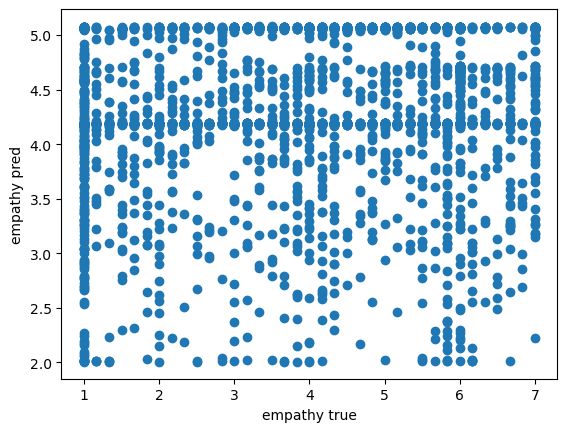

In [102]:
# plot empathy true vs empathy pred
plt.scatter(new_data['empathy'], new_data['empathy_pred'])
plt.xlabel('empathy true')
plt.ylabel('empathy pred')
plt.show()

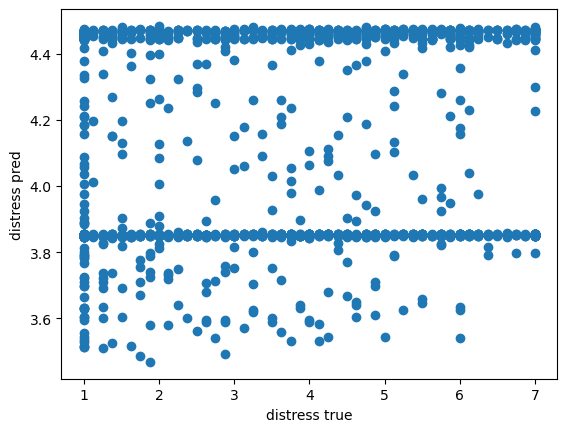

In [103]:
# plot distress true vs distress pred
plt.scatter(new_data['distress'], new_data['distress_pred'])
plt.xlabel('distress true')
plt.ylabel('distress pred')
plt.show()

In [120]:
empathy_level_true = []
distress_level_true = []
empathy_level_pred = []
distress_level_pred = []

for emp, dist in zip(new_data['empathy'], new_data['distress']):
    if emp < 3:
        empathy_level_true.append('low')
    elif emp >= 3 and emp <= 5:
        empathy_level_true.append('medium')
    else:
        empathy_level_true.append('high')
    if dist < 3:
        distress_level_true.append('low')
    elif dist >= 3 and dist <= 5:
        distress_level_true.append('medium')
    else:
        distress_level_true.append('high')

for emp, dist in zip(new_data['empathy_pred'], new_data['distress_pred']):
    if emp < 3:
        empathy_level_pred.append('low')
    elif emp >= 3 and emp <= 5:
        empathy_level_pred.append('medium')
    else:
        empathy_level_pred.append('high')
    if dist < 3:
        distress_level_pred.append('low')
    elif dist >= 3 and dist <= 5:
        distress_level_pred.append('medium')
    else:
        distress_level_pred.append('high')

In [105]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

<Axes: >

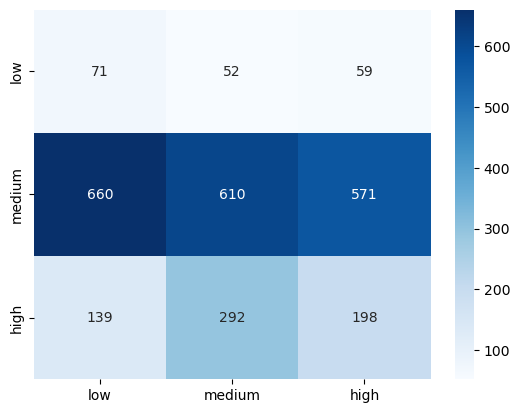

In [121]:
labels = ['low', 'medium', 'high']
cm_df = pd.DataFrame(confusion_matrix(empathy_level_pred, empathy_level_true, labels=labels),index=labels, columns=labels)
sns.heatmap(cm_df, annot=True, cmap="Blues", fmt='g', xticklabels=True, yticklabels=True)

<Axes: >

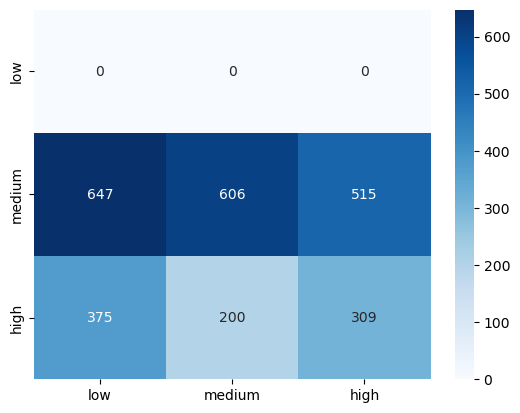

In [122]:
cm_df = pd.DataFrame(confusion_matrix(distress_level_pred, distress_level_true, labels=labels),index=labels, columns=labels)
sns.heatmap(cm_df, annot=True, cmap="Blues", fmt='g', xticklabels=True, yticklabels=True)

## Update datasets